In [43]:
from glob import glob
import json
from numpy import mean, std, amax, amin
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from pprint import pprint
from random import sample

import texte

In [44]:
# with open("LGERM.json", encoding="utf-8") as f:
#     LGERM = json.load(f)
# mots_LGERM = set(LGERM)

path = "Corpus/Mazarinades/*/*.xml"

files = glob(path)

print(len(files))

3065


Distribution mots outils

OCR performance prediction using cross-OCR
alignment
Ahmed BEN SALAH*, Jean philippe MOREUXt
, Nicolas RAGOT+ and Thierry PAQUET§

https://dl.acm.org/doi/pdf/10.1145/2595188.2595221


In [45]:
sample_mode = False

if sample_mode:
    files = sample(files, 200)
#     collection_textes = [texte.Texte(file) for file in tqdm(files)]
# else:
collection_textes = list(texte.corpora(files))


 29%|██▉       | 900/3065 [00:06<00:11, 182.70it/s]

Empty file: self.path = 'Corpus/Mazarinades/1201-1300/Moreau1240_GALL.xml'


100%|██████████| 3065/3065 [00:20<00:00, 150.57it/s]


In [46]:
import pandas as pd
df0 = pd.DataFrame(txt.header for txt in collection_textes)
df = pd.DataFrame(((txt.n_pages, txt.hapax_ratio, txt.ttr, txt.lexicalite) for txt in collection_textes), columns=["n_pages", "hapax_ratio", "ttr", "lexicalite"])
concat = pd.concat([df0, df], axis=1)

In [47]:
concat.drop("titre", axis=1).to_csv("stats.csv", sep=";")

In [48]:
concat

,form,genre,handwritten_note,table_of_content,illustration,creation,change,titre,dates,subject,subgenre,n_pages,hapax_ratio,ttr,lexicalite
0,prose,"[récit, relation]",False,False,False,1652-07-11,"{'@status': 'corrected', '@when': '2022-07-11'...",Relation véritable de ce qui s'est fait et pas...,"{'@type': 'file_creation', '@when': '2021-11-0...",NaN,NaN,16285.0,0.125414,0.728332,0.477839
1,prose,"[récit, relation]",False,False,False,1652-09-26,"{'@status': 'corrected', '@when': '2022-03-18'...",Relation véritable de tout ce qui s'est fait e...,"{'@type': 'file_creation', '@when': '2022-03-0...","[Beaufort, François de Bourbon-Vendôme (1616-1...",NaN,13546.0,0.148655,0.856835,0.337768
2,prose,"[narration, récit, liste]",False,False,False,1649-03-04,"{'@status': 'corrected', '@when': '2022-09-26'...",Relation véritable de ce qui s'est passé à la ...,"{'@type': 'file_creation', '@when': '2026-04-2...",None,NaN,15285.0,0.124672,0.747343,0.318103
3,prose,"[récit, relation]",False,False,False,1652-04-28,"{'@status': 'corrected', '@when': '2022-07-12'...",Relation véritable de tout ce qui s'est passé ...,"{'@type': 'file_creation', '@when': '2021-11-0...",NaN,NaN,22475.0,0.110743,0.695820,0.454202
4,prose,"[éloge, remerciement, discours adressé]",False,False,False,1650-10-01,"{'@status': 'corrected', '@when': '2022-10-25'...",Remercîment des Rordelois au roi sur le sujet ...,"{'@type': 'file_creation', '@when': '2022-10-2...",NaN,NaN,16167.0,0.124329,0.750423,0.527876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,prose,"[narration, récit]",False,False,False,1652-03-16,"{'@status': 'corrected', '@when': '2022-09-20'...",La défaite des troupes du sieur de Biron par c...,"{'@type': 'file_creation', '@when': '2026-04-2...",None,NaN,17357.0,0.128039,0.746587,0.527626
3061,prose,"[texte officiel, déclaration]",False,False,False,1648-04,"{'@status': 'corrected', '@when': '2021-11-16'...","Déclaration du roi, portant révocation de tout...","{'@type': 'file_creation', '@when': '2021-11-0...",NaN,NaN,23486.0,0.119238,0.753718,0.435979
3062,prose,"[texte officiel, articles, déclaration]",True,False,False,1649-12-11,"{'@status': 'corrected', '@when': '2022-03-10'...",Déclaration du roy.,"{'@type': 'file_creation', '@when': '2022-03-0...",Bordeaux,NaN,17680.0,0.117639,0.725938,0.488082
3063,prose,"[narration, récit]",False,False,False,1652-05-04,"{'@status': 'corrected', '@when': '2022-09-20'...","La défaite des troupes mazarines, à l’attaque ...","{'@type': 'file_creation', '@when': '2026-04-2...",None,NaN,15316.0,0.134369,0.768778,0.498945


In [49]:
concat.to_csv("stats.csv", sep=";")


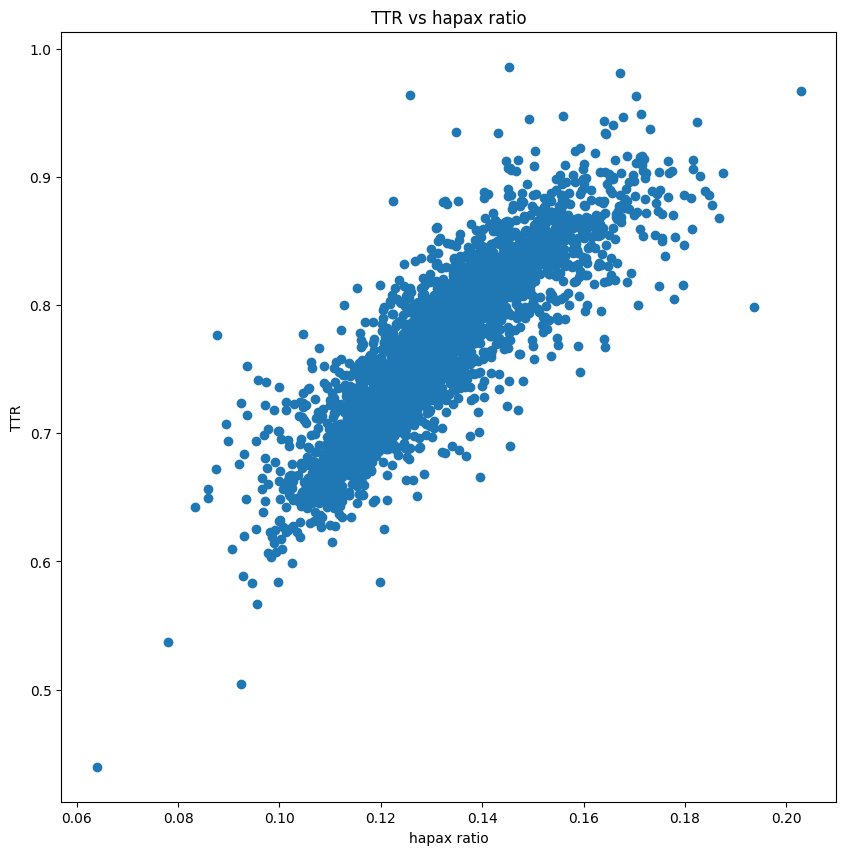

In [50]:
#tup = [(val["hapax_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.hapax_ratio, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs hapax ratio")
plt.xlabel("hapax ratio")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

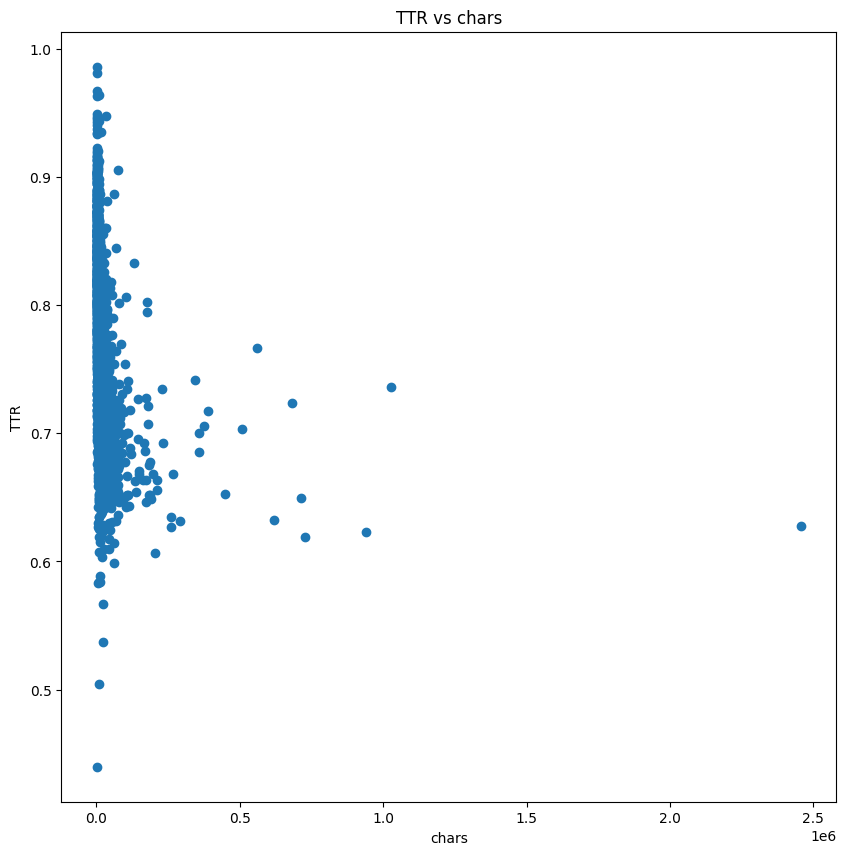

In [51]:
# tup = [(val["chars"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.n_chars, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs chars")
plt.xlabel("chars")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

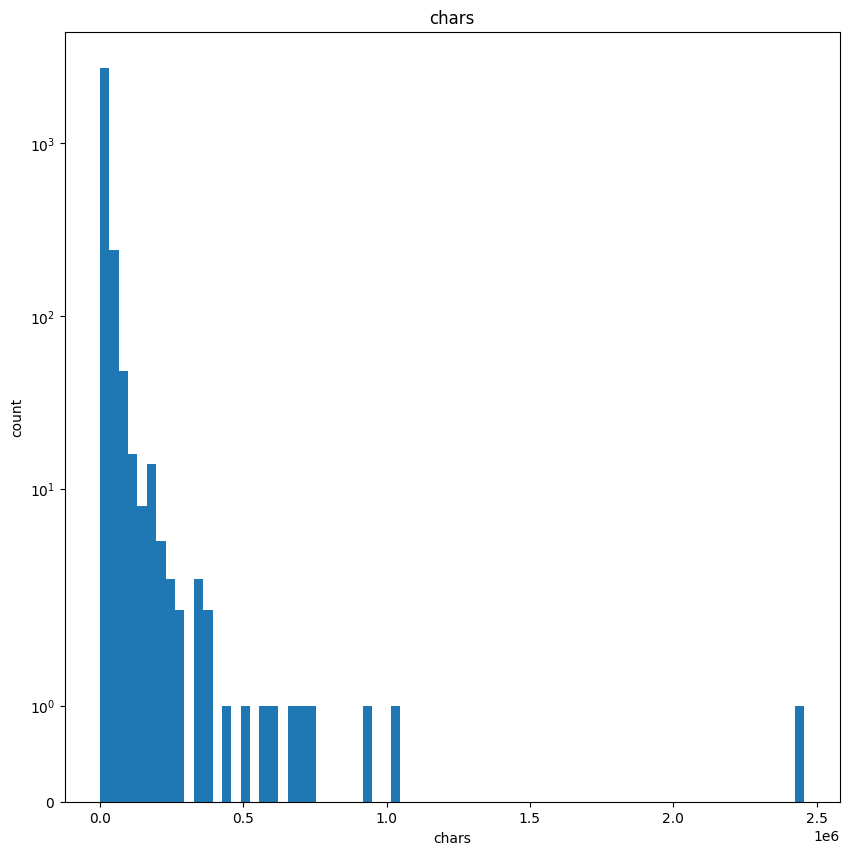

In [52]:
# x = [v["chars"] for v in dict_stats.values()]
x = [txt.n_chars if txt.n_chars else 0 for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("chars")
plt.xlabel("chars")
plt.ylabel("count")
plt.xscale('linear')
plt.yscale('symlog', linscale=1)
plt.hist(x, bins=75)

plt.show()

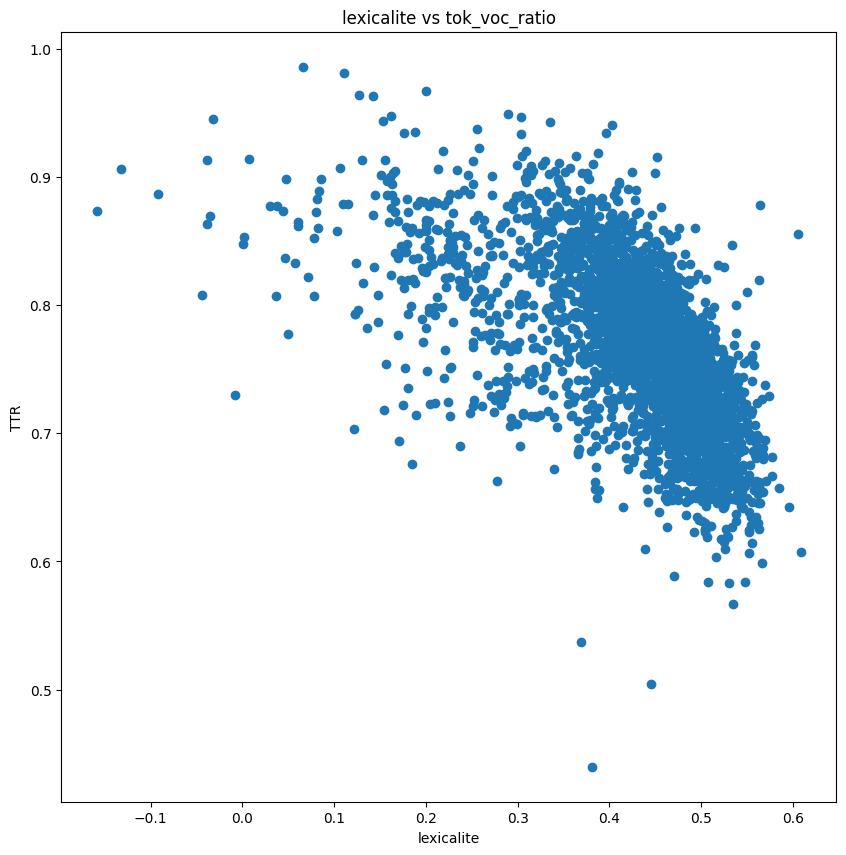

In [53]:
# tup = [(val["tok_voc_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.lexicalite, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("lexicalite vs tok_voc_ratio")
plt.xlabel("lexicalite")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [54]:
x = [txt.header["change"]["@status"] if isinstance(txt.header["change"], dict) else txt.header["change"][0]["@status"]
     for txt in collection_textes]
len(x) / len([e for e in x if e == "corrected"])

1.0

In [55]:
for txt in collection_textes:
    pprint(txt.header)
    break

{'change': {'@status': 'corrected', '@when': '2022-07-11', '@who': 'AB'},
 'creation': '1652-07-11',
 'dates': {'#text': '2 novembre 2021',
           '@type': 'file_creation',
           '@when': '2021-11-02'},
 'form': 'prose',
 'genre': ['récit', 'relation'],
 'handwritten_note': False,
 'illustration': False,
 'table_of_content': False,
 'titre': "Relation véritable de ce qui s'est fait et passé dans\n"
          "          l'audience donnée à Saint-Denys, le onzième juillet 1652, "
          'à messieurs les députés du\n'
          '          Parlement, avec les propres termes de la réponse à eux '
          'faite de la part du roi par\n'
          '          monsieur le garde des sceaux.'}


In [56]:
txt.ttr, txt.lexicalite

(0.7283317837572795, 0.4778386126227628)

In [57]:
def stats(key):
    stats = {}
    for txt in collection_textes:
        type_ = txt.header["form"] if isinstance(txt.header["form"], str) else tuple(txt.header["form"])

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, key))

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {key}")
    plt.xlabel("type")
    plt.ylabel(f"mean {key}")

    plt.bar(*zip(*plot))

    plt.show()

In [58]:
stats("ttr")


prose: 0.753


TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

In [ ]:
stats("hapax_ratio")

In [ ]:
def stats2(header_prop, stats_prop):
    stats = {}
    for txt in collection_textes:
        if header_prop not in txt.header:
            continue

        type_ = txt.header[header_prop]

        if isinstance(type_, bool):
            type_ = str(type_)

        if not isinstance(type_, str):
            type_ = tuple(type_)

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, stats_prop))

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {stats_prop}")
    plt.xlabel(f"{header_prop}")
    plt.ylabel(f"mean {stats_prop}")

    plt.bar(*zip(*plot))

    plt.show()


In [ ]:
stats2("creation", "hapax_ratio")

In [ ]:
stats2("creation", "ttr")

In [ ]:
stats2("table_of_content", "n_chars")
stats2("table_of_content", "ttr")

In [ ]:
import string

french_chars = {'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'œ', 'ù', 'û', 'ü', 'À', 'Â', 'Ä', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Î', 'Ï', 'Ô',
     'Œ', 'Ù', 'Û', 'Ü', 'à', 'â', 'ä', 'æ', 'ç'}.union(set(string.printable))

"ſ" in french_chars, "a" in french_chars, "é" in french_chars, ":" in french_chars

In [ ]:


def mot_is_french(mot):
    for char in mot:
        if char not in french_chars:
            return False
    return True

for txt in collection_textes:
    i, j, tot = 0, 0, 0
    for page in txt.pages:
        for phrase in page:
            for mot in phrase.split():
                tot += 1
                if mot_is_french(mot):
                    i += 1
                else:
                    j += 1

    print(i, j, tot, i / tot, j / tot)


In [ ]:
ttrlist = [(txt.ttr, i) for i, txt in enumerate(collection_textes) if txt.ttr]
hapaxlist = [(txt.hapax_ratio, i) for i, txt in enumerate(collection_textes) if txt.hapax_ratio]
lexicalitelist = [(txt.lexicalite, i) for i, txt in enumerate(collection_textes) if txt.lexicalite]


In [ ]:
ttrlist = sorted(ttrlist, key=lambda x: x[0], reverse=True)
hapaxlist = sorted(hapaxlist, key=lambda x: x[0], reverse=True)
lexicalitelist = sorted(lexicalitelist, key=lambda x: x[0], reverse=True)


In [ ]:
print(ttrlist[-1])
collection_textes[ttrlist[-1][1]].header

In [ ]:
print(ttrlist[0])
collection_textes[ttrlist[0][1]].header

In [ ]:
print(hapaxlist[-1])
collection_textes[hapaxlist[-1][1]].header


In [ ]:
print(hapaxlist[0])
collection_textes[hapaxlist[0][1]].header


In [ ]:
print(lexicalitelist[-1])
collection_textes[lexicalitelist[-1][1]].header


In [ ]:
print(lexicalitelist[0])
collection_textes[lexicalitelist[0][1]].header


In [59]:
collection_textes[1876].lexicalite


-0.09209734755263878